## 1.0 Introduction

Project Name: Retail Sales Analytics: Driving Business Decisions with Data
- In this project, I analyzed a retail sales dataset sourced from Kaggle to uncover actionable insights that can drive business decisions and improve profitability. The dataset contains transactional data, including customer demographics, product details, payment methods, and sales metrics.
- By leveraging Python and data visualization tools, I performed a comprehensive Exploratory Data Analysis (EDA) to identify trends, customer behavior, and opportunities for growth.

## Skills Demonstrated
- Data Cleaning: Handling missing values and transforming data for analysis.
- Exploratory Data Analysis (EDA): Uncovering patterns and trends in the data.
- Data Visualization: Creating insightful visualizations using matplotlib, seaborn, and plotly.
- Business Insights: Translating data into actionable recommendations for profitability.
- Storytelling: Presenting findings in a clear and structured manner.

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Step 2: Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

# Load the dataset into a DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['sample1_retail_sales.csv']))

Saving sample1_retail_sales.csv to sample1_retail_sales.csv


## Step 3: Check Dataset Structure and Summary Statistics

In [3]:
# Display the first few rows of the dataframe
df.head()

,transaction_id,timestamp,customer_id,product_id,product_category,quantity,price,discount,payment_method,customer_age,customer_gender,customer_location,total_amount
0,40613,1/29/2023 4:52,4830,660,Books,9,499.57,0.0,Debit Card,23,Other,Africa,4496.13
1,725855,5/19/2024 1:34,3909,445,Beauty & Personal Care,9,498.18,0.0,Credit Card,20,Other,Africa,4483.62
2,714769,5/11/2024 8:48,3298,534,Home & Kitchen,9,498.10,0.0,Gift Card,46,Other,North America,4482.90
3,969745,11/4/2024 10:24,2137,819,Home & Kitchen,9,497.61,0.0,PayPal,49,Female,Africa,4478.49
4,858677,8/19/2024 7:16,2160,961,Clothing,9,497.22,0.0,Debit Card,46,Other,North America,4474.98


In [4]:
# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     199 non-null    int64  
 1   timestamp          199 non-null    object 
 2   customer_id        199 non-null    int64  
 3   product_id         199 non-null    int64  
 4   product_category   199 non-null    object 
 5   quantity           199 non-null    int64  
 6   price              199 non-null    float64
 7   discount           199 non-null    float64
 8   payment_method     199 non-null    object 
 9   customer_age       199 non-null    int64  
 10  customer_gender    199 non-null    object 
 11  customer_location  199 non-null    object 
 12  total_amount       199 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 20.3+ KB


# Step 4: Data Cleaning

In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 transaction_id       0
timestamp            0
customer_id          0
product_id           0
product_category     0
quantity             0
price                0
discount             0
payment_method       0
customer_age         0
customer_gender      0
customer_location    0
total_amount         0
dtype: int64


## Step 5: Data Preprocessing

In [6]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
# Add a 'month' and 'hour' column for time-based analysis
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour

## Step 6: Descriptive Statistics

In [8]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        transaction_id                      timestamp  customer_id  product_id  \
count      199.000000                            199   199.000000  199.000000   
mean    512351.954774  2023-12-22 19:10:57.286432256  3018.090452  521.788945   
min       1676.000000            2023-01-02 03:55:00  1058.000000  101.000000   
25%     198028.500000            2023-05-18 12:27:30  2120.500000  294.000000   
50%     529042.000000            2024-01-03 09:21:00  2884.000000  496.000000   
75%     797565.000000            2024-07-07 20:44:00  4013.500000  743.000000   
max     994274.000000            2024-11-21 11:13:00  4986.000000  998.000000   
std     312260.188597                            NaN  1129.705746  268.041109   

       quantity       price    discount  customer_age  total_amount  \
count     199.0  199.000000  199.000000    199.000000    199.000000   
mean        9.0  491.959548    0.015025     43.417085   4360.823467   
min         9.0  478.000000    0.00

## Step 6: Exploratory Data Analysis (EDA) and Insights

- 6.1: Insight 1: Sales Trends Over Time

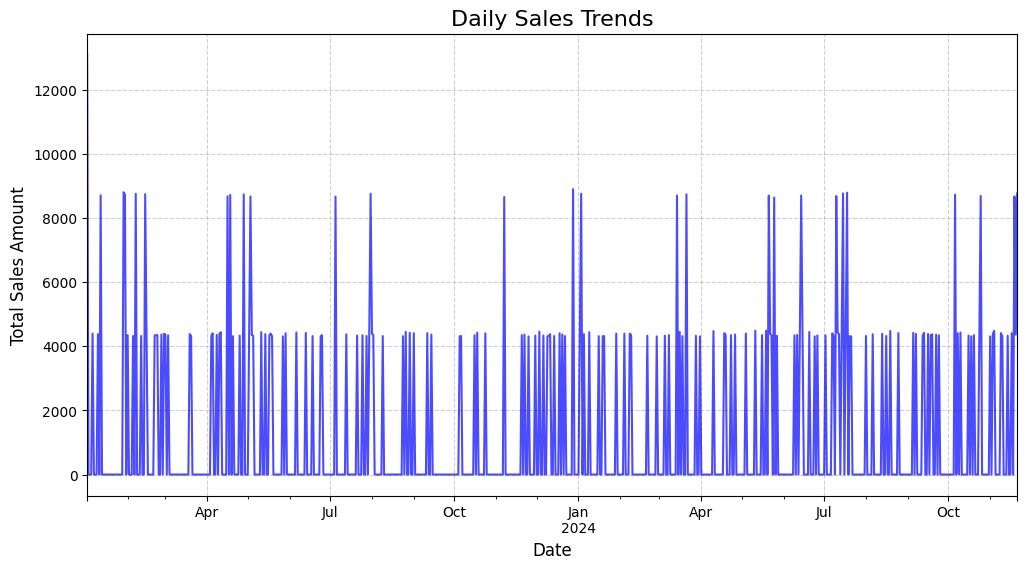

In [10]:
# Daily sales trends
daily_sales = df.resample('D', on='timestamp')['total_amount'].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot(color='blue', alpha=0.7)
plt.title("Daily Sales Trends", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

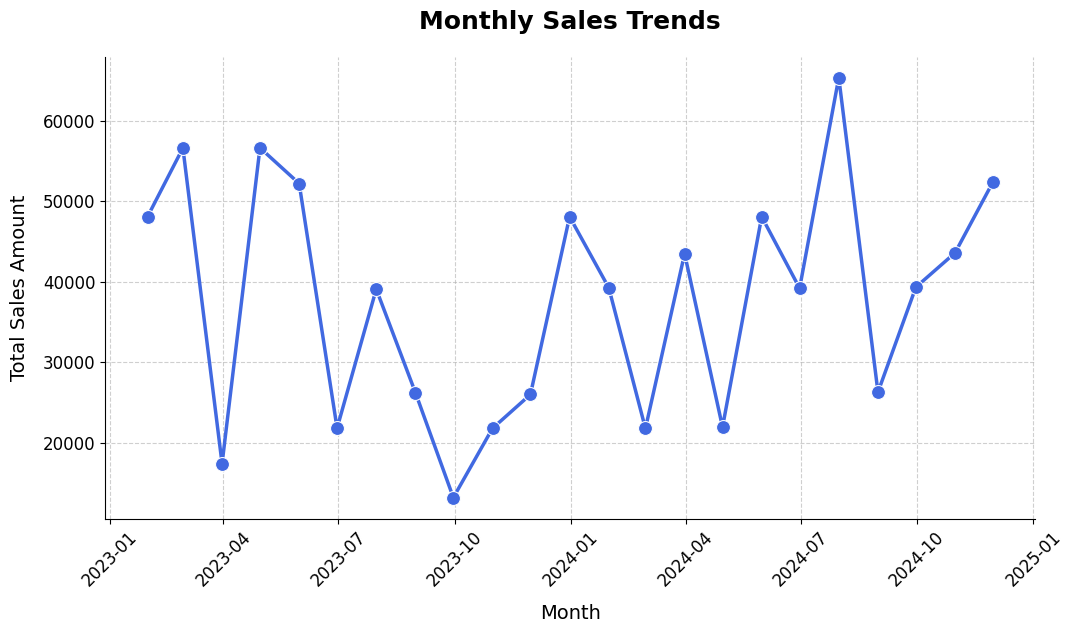

In [32]:
# Monthly Sales Trends (Enhanced)
# Aggregate sales by month using 'ME' for monthly resampling
monthly_sales = df.resample('ME', on='timestamp')['total_amount'].sum().reset_index()

# Plot Monthly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='timestamp', y='total_amount', marker='o', color='royalblue', linewidth=2.5, markersize=10)
plt.title("Monthly Sales Trends", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Month", fontsize=14, labelpad=10)
plt.ylabel("Total Sales Amount", fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

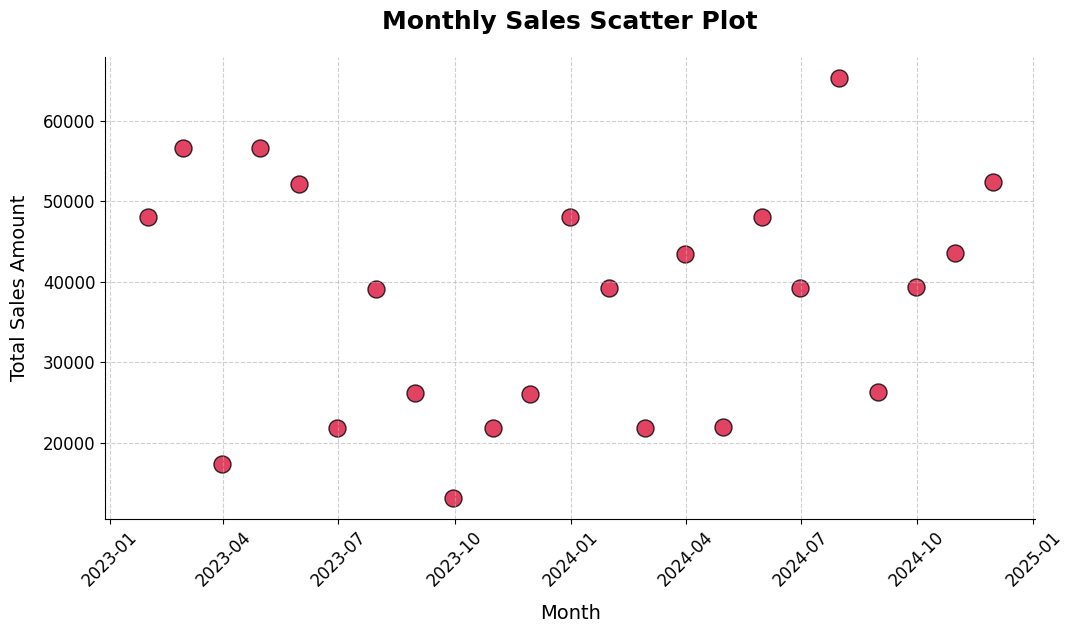

In [13]:
# Add a Scatter Plot for Monthly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=monthly_sales, x='timestamp', y='total_amount', s=150, color='crimson', edgecolor='black', alpha=0.8)
plt.title("Monthly Sales Scatter Plot", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Month", fontsize=14, labelpad=10)
plt.ylabel("Total Sales Amount", fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

## 6.2: Insight 2: Sales by Product Category

<ipython-input-16-cedbacec7b7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis', edgecolor='black')


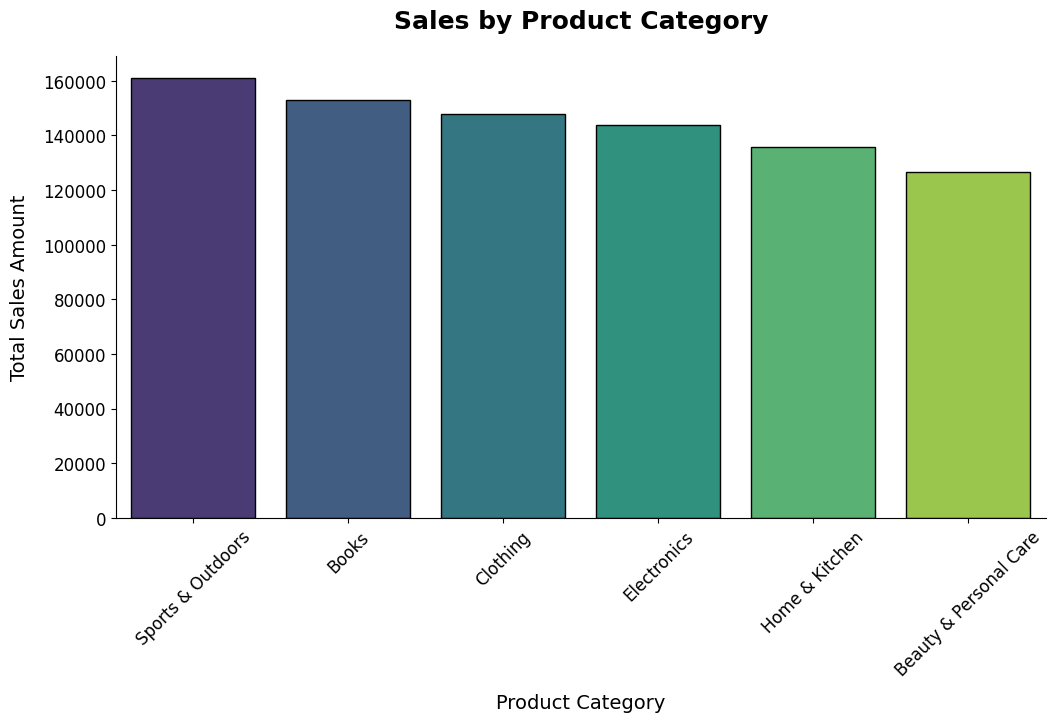

In [16]:
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis', edgecolor='black')
plt.title("Sales by Product Category", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Product Category", fontsize=14, labelpad=10)
plt.ylabel("Total Sales Amount", fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

##6.3 Insight 3: Customer Age and Gender Distribution

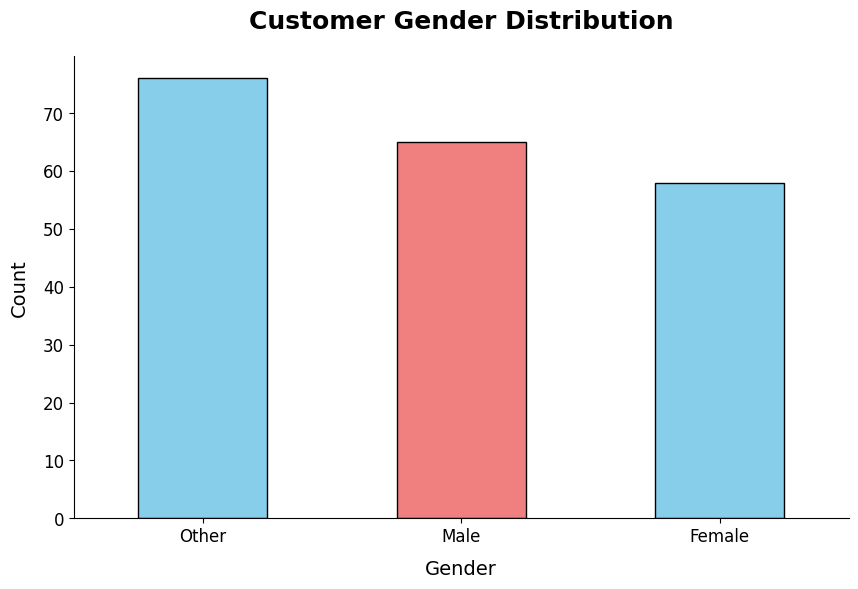

In [19]:
# Insight 3A: Gender Distribution
gender_distribution = df['customer_gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title("Customer Gender Distribution", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Gender", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

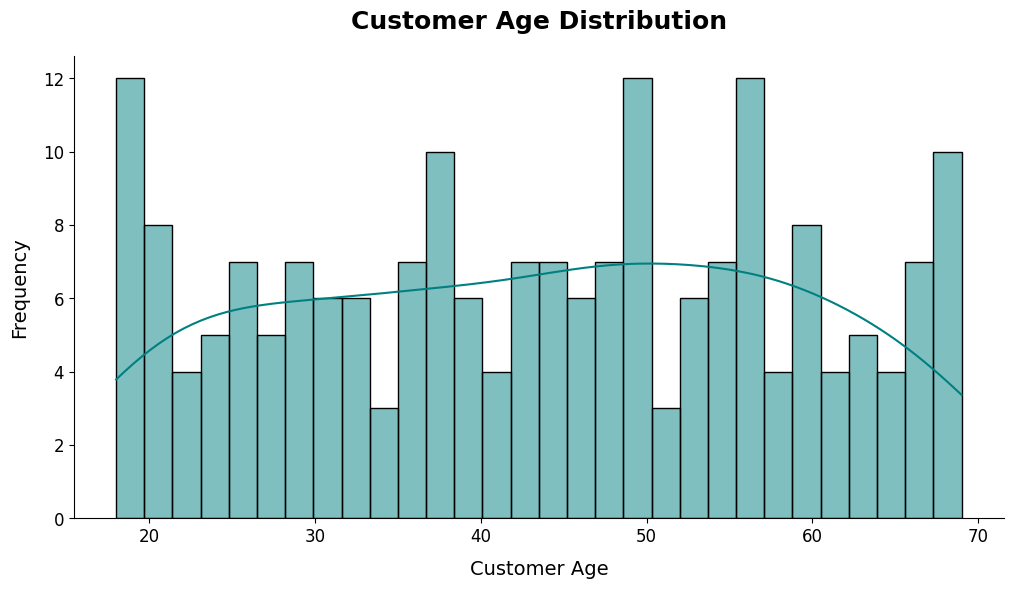

In [21]:
# Insight 3B: Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='customer_age', bins=30, kde=True, color='teal', edgecolor='black')
plt.title("Customer Age Distribution", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Customer Age", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

## 6.4:  Insight 4: Payment Method Preferences

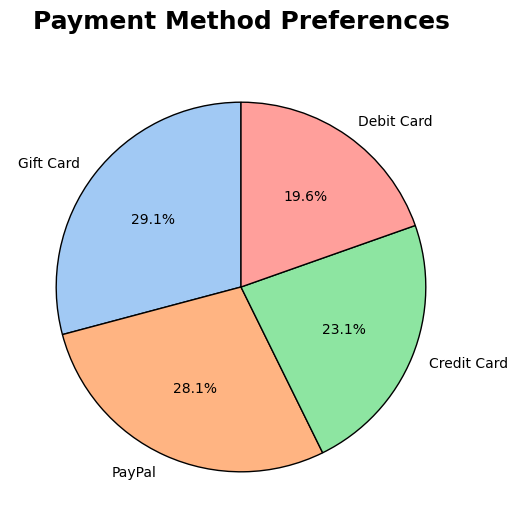

In [23]:
payment_methods = df['payment_method'].value_counts()

plt.figure(figsize=(10, 6))
payment_methods.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Payment Method Preferences", fontsize=18, fontweight='bold', pad=20)
plt.ylabel("")
plt.show()

## 6.5: Insight 5: Discount Impact on Sales

<ipython-input-31-146ece3c8452>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




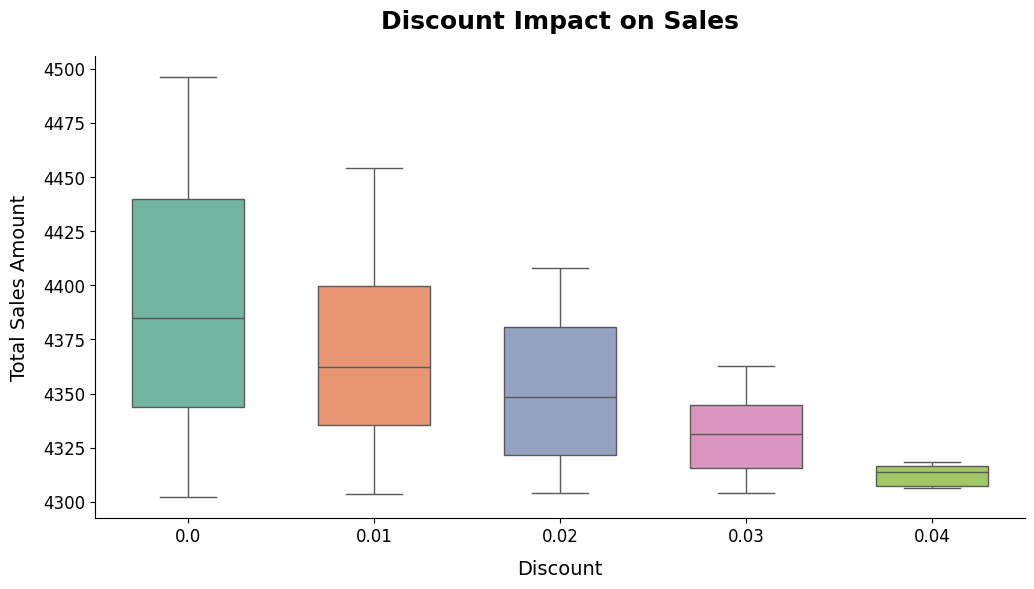

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='discount', y='total_amount', palette='Set2', width=0.6, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title("Discount Impact on Sales", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Discount", fontsize=14, labelpad=10)
plt.ylabel("Total Sales Amount", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

## 6.6: Insight 6: Geographic Sales Distribution

<ipython-input-26-c9f8a146bc1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_sales.index, y=location_sales.values, palette='magma', edgecolor='black')


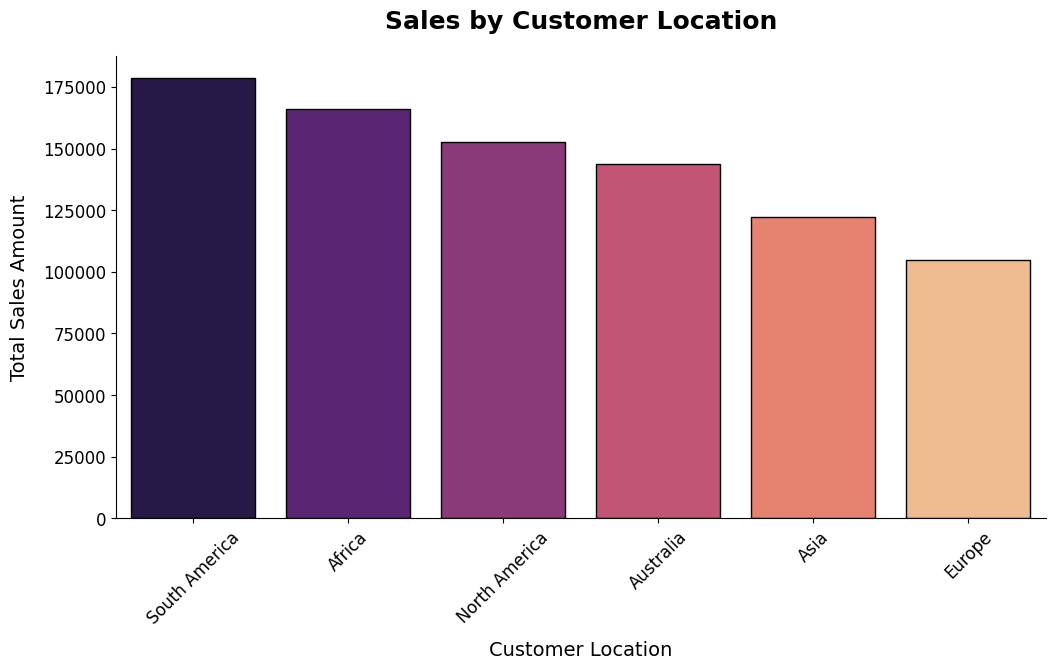

In [26]:
location_sales = df.groupby('customer_location')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_sales.index, y=location_sales.values, palette='magma', edgecolor='black')
plt.title("Sales by Customer Location", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Customer Location", fontsize=14, labelpad=10)
plt.ylabel("Total Sales Amount", fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

## Conclusion

This project transformed retail sales data into actionable insights using Python (Pandas, Plotly, Dash) to analyze trends, customer behavior, and product performance. Key findings include:  
- Monthly sales growth and seasonal peaks,  
- Top-performing product categories,  
- High-value customer demographics (age/gender),  
- Discount strategies impacting revenue,  
- Geographic hotspots for sales.  

**Skills Demonstrated**: Data cleaning, EDA, interactive dashboard development, and translating insights into business strategies.  

**Impact**: Empowers businesses to optimize inventory, target marketing, refine pricing, and boost retention. By bridging data science and business strategy, this work highlights my ability to drive profitability through data-driven decisions.  

Let’s unlock your data’s potential!

A project by Victor Koech (c) 2025